In [1]:
# import pandas as pd
import numpy as np
import random as random
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd

In [2]:
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

In [3]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def normalize_array(array):
    normalized_array = np.true_divide(array, 255)
    return normalized_array

def add_bias(array):
    bias_matrix = np.ones(np.shape(array)[0])
    array = np.insert(array, 0, bias_matrix, axis=1)
    return array

#formulate a binary vector
def one_hot_encode(array):
    no_of_classes = len(np.unique(array))
    one_hot_encoded_array = np.eye(no_of_classes)[array.reshape(-1)]
    return one_hot_encoded_array

#vals between [-0.05,0.05]
def create_weight_matrix():
    
    weight_matrix =np.random.uniform(-0.05, 0.05, size=(785,10))
    print(weight_matrix)
    return weight_matrix

def predict(inputs, weight_matrix):
    #print('INPUT DIMS')
    #print(inputs.size)
    activations = np.dot(inputs, weight_matrix)
    #this should return 785X10
    return activations

def update_weights(X_train, Y_train_target, weights, learning_rate):
    '''
    Matrix multiplication: # columns in first matrix must equal # rows in second. 
    Dot product = rowA must be same as column B
    a=3x2 
    b= 2x3
    temp Weight Matrix dimensions
    (785,)
    X_train dimensions
    (60000, 785)
    Prediction dimensions
    (60000, 10)
    Y_train_target dimensions
    (60000, 10)
    Weight Matrix dimensions
    (785, 10)
    Adjusted Weight Matrix dimensions
    (785, 10)
    '''
    Y_predictions = predict(X_train, weights)
    print('predictionArraySize')
    print(Y_predictions.size)
    print('first prediction')
    print( Y_predictions[0])
    print('Second prediction')
    print(Y_predictions[1])
    print('predictions')
    print(Y_predictions)
    temp_weights = np.random.uniform(np.shape(weights))
    temp_weights = learning_rate * np.dot(np.transpose(X_train), Y_predictions - Y_train_target)
    adjusted_weights = weights-temp_weights
    return adjusted_weights

def train_perceptron(X_train, Y_train_target, weights, X_test, Y_test_target, learning_rate=0.1):
    y_pred_labels=[]
    y_true_labels=[]
    y_false=[]
    acc_array=[]
    time_array=[]
    predicted_labels=0;
    
    train_acc_array=[]
    train_time_array=[]
    
    for e in range(70):
        train_correct = 0
        test_correct= 0
        for index, sample in enumerate(X_train):
            #this turns our vector (785,) to matrix so we can dot produc it in update(), sample is 1x785, a whole image
            sample = sample.reshape((1, 785))
            
            #y_pred is the probabilities of this current image, so 1x10, like [0.1, 0.3, 0.8....]
            #each column represents our respecitve class value
            y_pred = predict(sample, weights).reshape((1, 10))
            
            #pred_label is the label we predicted since we used argmax, we get the index of the largest value
            pred_label = np.argmax(y_pred) #each index represents respective class 0-9
            
            # meanwhile the true label for this sample, Y_train_target contains the true label for all 60000 images, 
            # our current sample is sample index, so we just... 9 = > [0, 0, 0, .. 1]
            true_label = Y_train_target[index]
            
            # if we predicted correctly, just add a record, and move on to the next training sample
            if pred_label == true_label:
                train_correct += 1
                continue
           
            else:
                # if we predicted it wrong, we calculate the error and update
                # the prediected is [0.1, 0.3 ....]
                #if threshold>0 store the value else set value to zero
                y_pred_threshold = np.where(y_pred>0, 1, 0)
                # [0, 1, ....]
                #we propcess the true label, one hot encode 
                true_label_array = np.zeros_like(y_pred)
                #true_label represents correct class (index from y_train_target)
                true_label_array[0, true_label] = 1
                # [0, 0, ... , 1]
                error = y_pred_threshold - true_label_array
                # error is 1x10, sample is 1x785
                #sample.T is 785x1, error is 1x10, after dot producet is 785x10, because this is the weight matrix
                dW = np.dot(sample.T, learning_rate*error)
                weights -= dW
        curr_train_accuracy = train_correct / 60000
        #print(curr_train_accuracy)
        #plot accuracy over time
        train_acc_array.append(curr_train_accuracy)
        
        
        
        
        for index, sample in enumerate(X_test):
            #make sure our weights are accurate against X_test data.
            #this turns our vector (785,) to matrix so we can dot produc it in update(), sample is 1x785, a whole image
            sample = sample.reshape((1, 785))
            
            #y_pred is the probabilities of this current image, so 1x10, like [0.1, 0.3, 0.8....]
            #each column represents our respecitve class value
            y_pred = predict(sample, weights).reshape((1, 10))
            
            #pred_label is the label we predicted since we used argmax, we get the index of the largest value
            pred_label = np.argmax(y_pred) #each index represents respective class 0-9
            
            # meanwhile the true label for this sample, Y_train_target contains the true label for all 60000 images, 
            # our current sample is sample index, so we just... 9 = > [0, 0, 0, .. 1]
            true_label = Y_test_target[index]
            
            y_pred_labels.append(pred_label)
            y_true_labels.append(true_label)
            
            
            
            # if we predicted correctly, just add a record, and move on to the next training sample
            if pred_label == true_label:
                test_correct += 1
                continue
                
        curr_test_accuracy = test_correct / 10000
        acc_array.append(curr_test_accuracy)
        time_array.append(e)
        
        
        #print(f'current epoch number is {e}, and our current Test accuracy is {curr_test_accuracy}')
            
       
    conf_mat = confusion_matrix(y_true_labels, y_pred_labels)
    print(conf_mat)
    plt.plot(time_array,train_acc_array)
    plt.plot(time_array,acc_array)
    plt.title('accuracies over epochs')
    plt.xlabel('epochs')
    plt.ylabel('accuracies')
    plt.show()
  

(60000,)
[[ 0.0144005   0.03941558  0.03235556 ...  0.02021457 -0.0144718
   0.04760608]
 [ 0.01203471 -0.01119952  0.00730087 ...  0.01517492  0.01312035
   0.03714673]
 [-0.0369951  -0.03382868 -0.01049922 ...  0.00565105  0.02918175
   0.02472216]
 ...
 [-0.01862474  0.03739635  0.03167163 ... -0.03384852 -0.03707648
  -0.03721695]
 [-0.03874616  0.01730343 -0.01521567 ...  0.04820753 -0.0177415
  -0.03893883]
 [-0.00105341 -0.04045813  0.04535366 ...  0.02557078  0.04108509
   0.03517798]]
[[66457     0   160   170    13   529   557   200   269   245]
 [   10 77292    91   596    78   134   264    53   835    97]
 [  936  4033 49983  8476   468  1136  2476   632  3315   785]
 [  507   151   740 63899   133  2056   358   859   618  1379]
 [  358   128   511   218 51413    51  2094   307  1108 12552]
 [  922   326   281  5909   991 45312  1916   698  3458  2627]
 [  800   312   307    71   177  1633 63301    51   350    58]
 [  167   799  1315  1645   795   132    88 57753   788  847

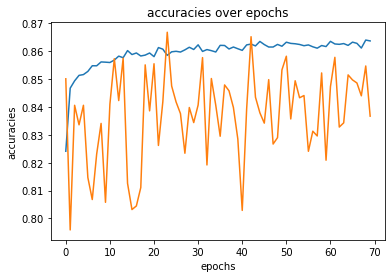

In [5]:
data_train = np.array(train)
data_test = np.array(test)
#print('original dimensions of trainSet')
#print(data_train.shape)
#print('original dimensions of testSet')
#print(data_test.shape)

#go to first index, skip zero index because we zero index values for target
X_train = data_train[:, 1:]
#print('dimensions of TRAIN set')
#print(X_train.shape)
X_train_normalized = normalize_array(X_train)
#print('dimensions of Normalized Training Set')
#print(X_train_normalized.shape)

#add bias to normalized trainingSet
X_train = add_bias(X_train_normalized)
#print('biasedXarray')
#print(X_train.shape)

X_test = data_test[:, 1:]
#print('dimensions of TEST set')
#print(X_test.shape)
X_test_normalized = normalize_array(X_test)
#print('X_test_normalized dimensions')
#print(X_test_normalized.shape)
X_test = add_bias(X_test_normalized)

Y_train_target = data_train[:, 0].astype(int)
#print('Train TARGET dimensions')
print(Y_train_target.shape)


Y_test_target = data_test[:, 0].astype(int)
#print('Y test target Array dimensions')
#print(Y_test_target.shape)



weights = create_weight_matrix()
#print('weightMatrixDimensions')
#print(weights.shape)



train_perceptron(X_train, Y_train_target, weights, X_test, Y_test_target, learning_rate=0.1)


